# Final Project - Introduction to Machine Learning: Supervised Learning

This is my final project for **CSCA 5622 Introduction to Machine Learning: Supervised Learning**. 

I am utilizing data from UCI Machine Learning Repository https://archive.ics.uci.edu/ 

I am using a Dataset called **Adult** that has the following description:

*Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
.*
   

Source: https://archive.ics.uci.edu/dataset/2/adult

Citation: Becker, B. & Kohavi, R. (1996). Adult [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

This is Github repository: https://github.com/MinjieDING/CSCA_5622_Introduction_to_Machine_Learning_Supervised_Learning.

# 1. Preparation

## Objective
I want to use this data to help predict Predict whether annual income of an individual exceeds $50K/yr based on census data. 

## Main model
The main model I will use is a Data Tree Classifier as it utilizes all the features provided in the data, and will also help me to find the most important features. 

## Import Libraries and Data
We start with importing necessary libraries:

In [1]:
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn import tree


Source: https://archive.ics.uci.edu/dataset/2/adult

### Data Import

We then import the data from the data file:

In [2]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
# print(adult.metadata) 
  
# variable information 
print(adult.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

Below we see a sample of the data

In [4]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


There doesn't seem to be any NULL values but they are set to unknown

In [6]:
print(X.info())
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
print(y.info())
y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB
None


,income
count,48842
unique,4
top,<=50K
freq,24720


We initially have 13 features with 48842 rows, as we go through data cleaning this may change.

In [8]:
df = merged_data = pd.concat([X, y], axis=1)
df['income'] = df['income'].replace('<=50K.', '<=50K')
df['income'] = df['income'].replace('>50K.', '>50K')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning

We want to find the columns that have null values and the course of action for each.

In [9]:
for c in df.columns:
    if(df[c].isnull().sum() / len(df) >0 and df[c].isnull().sum() / len(df) <= .05):
        print("Impute column '",c, "'  - Percenteage of null values: ", df[c].isnull().sum() / len(df))
    elif (df[c].isnull().sum() / len(df)) > .05:
        print("Drop column '", c, "'  - Percenteage of null values: ", X[c].isnull().sum() / len(df))

Impute column ' workclass '  - Percenteage of null values:  0.019716637320339053
Impute column ' occupation '  - Percenteage of null values:  0.019778059866508334
Impute column ' native-country '  - Percenteage of null values:  0.005609925883460955


There is no column with too many missing values. There are three columns that contain null values, but they can be inputed with the mode of each as they are all categorical columns.  

In [10]:
#Impute the remaining columns with null values
cols = df.columns
feats_w_null = []
for c in df.columns:
    if df[c].isnull().sum() > 0:
        feats_w_null.append(c)


print(feats_w_null)


['workclass', 'occupation', 'native-country']


In [11]:
#For each column in feats_w_null we get the mode and replace all null values with the most common entry

for x in feats_w_null:
    replacement = df[x].mode()
    df[x].fillna(replacement[0], inplace=True)
    print("Filled nulls for", x)


Filled nulls for workclass
Filled nulls for occupation
Filled nulls for native-country


In [12]:
for c in df.columns:
    if(df[c].isnull().sum() / len(df) >0 and df[c].isnull().sum() / len(df) <= .05):
        print("Impute: ",c)
    elif (df[c].isnull().sum() / len(df)) > .05:
        print("Drop :", c)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


After data cleaning, we now have no null values and 13 features with the same number of rows. 

### Data Visualization
Lets take a deeper dive into the categorical data and visualize them

#### workclass

<Axes: ylabel='workclass'>

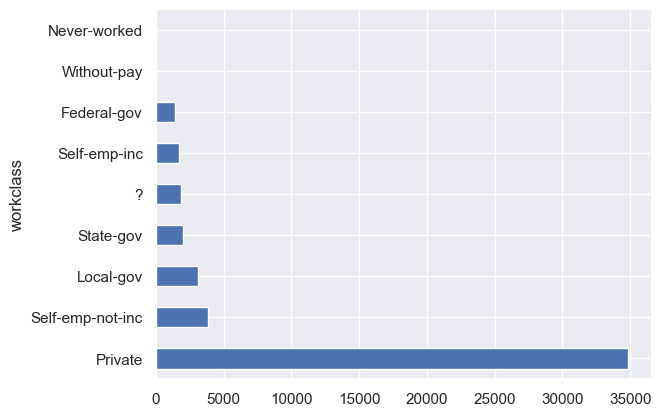

In [14]:
df['workclass'].value_counts().plot(kind='barh')

In [15]:
workclass = df.groupby(['workclass', 'income']).size().unstack()
workclass

income,<=50K,>50K
workclass,,
?,1645.0,191.0
Federal-gov,871.0,561.0
Local-gov,2209.0,927.0
Never-worked,10.0,NaN
Private,27408.0,7461.0
Self-emp-inc,757.0,938.0
Self-emp-not-inc,2785.0,1077.0
State-gov,1451.0,530.0
Without-pay,19.0,2.0


From this we can see that self-emp-inc is an important factor, where there are more people >50k than <=50k. 

#### education

<Axes: ylabel='education'>

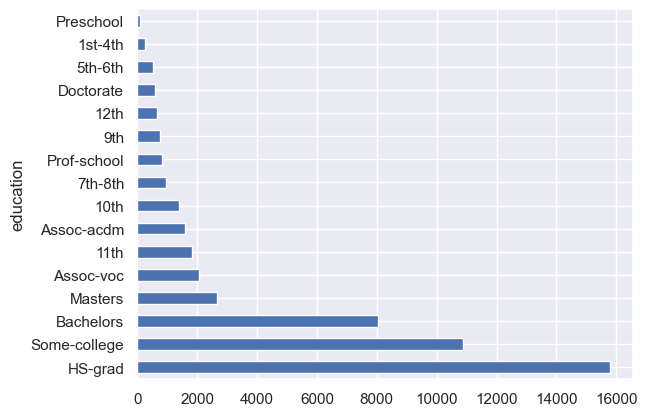

In [16]:
df['education'].value_counts().plot(kind='barh')

In [17]:
weather = df.groupby(['education', 'income']).size().unstack()
weather

income,<=50K,>50K
education,,
10th,1302,87
11th,1720,92
12th,609,48
1st-4th,239,8
5th-6th,482,27
7th-8th,893,62
9th,715,41
Assoc-acdm,1188,413
Assoc-voc,1539,522


More educated people have higher income.

# 2. Categorical string to int
We need to change all string categorical data into integer. I utilized the LabelEncoder function in sklearn to do this instead of manually mapping each instance to a value.

In [18]:
dtypes = df.dtypes #Data Types for each column
columns = df.columns # Columns in dataframe
for x in columns:
    if dtypes[x] == object: #If the values are not continous
        print("Column:",x, '\n', " String categories:",df[x].unique()) #Print old string categories
        le = preprocessing.LabelEncoder() #Init LabelEncoder
        le.fit(df[x].unique()) #Fit it with the unique values in the dataframe column
        df[x] = le.transform(df[x]) #Transform them into their integer values
        print( "  Int categories:",df[x].unique()) #Print new values

Column: workclass 
  String categories: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
  Int categories: [7 6 4 1 2 0 5 8 3]
Column: education 
  String categories: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
  Int categories: [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
Column: marital-status 
  String categories: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
  Int categories: [4 2 0 3 5 1 6]
Column: occupation 
  String categories: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
  Int categories: [ 1  4  6 10  8 12  3 14  5  

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   workclass       48842 non-null  int32
 2   fnlwgt          48842 non-null  int64
 3   education       48842 non-null  int32
 4   education-num   48842 non-null  int64
 5   marital-status  48842 non-null  int32
 6   occupation      48842 non-null  int32
 7   relationship    48842 non-null  int32
 8   race            48842 non-null  int32
 9   sex             48842 non-null  int32
 10  capital-gain    48842 non-null  int64
 11  capital-loss    48842 non-null  int64
 12  hours-per-week  48842 non-null  int64
 13  native-country  48842 non-null  int32
 14  income          48842 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.9 MB
None


Now we have all our columns in numerical form with both continous and categorical data. 

# 3. Data Correlation
Lets test the correlation between the data and find the most correlated feature to our result

<Axes: >

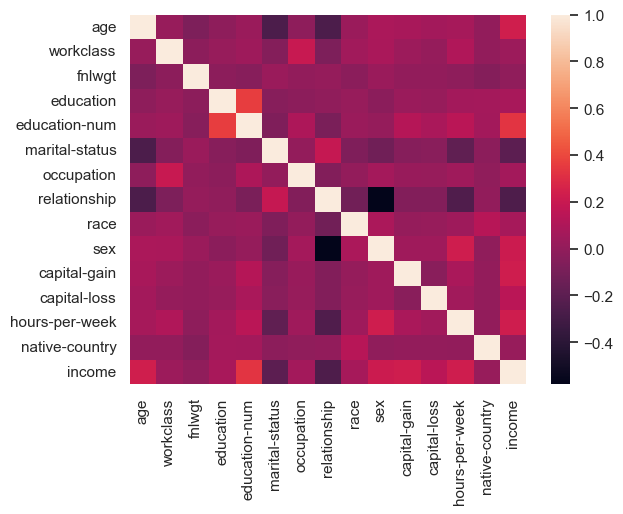

In [20]:
sns.heatmap(df.corr()) #Heatmap for correlations in dataframe

In [21]:
#Y is the last column/row in the correlation above, we can quantify it below:
correlation = df.corr()['income']
print(correlation.sort_values(ascending=False))

income            1.000000
education-num     0.332613
age               0.230369
hours-per-week    0.227687
capital-gain      0.223013
sex               0.214628
capital-loss      0.147554
education         0.080091
race              0.070934
occupation        0.060018
workclass         0.034697
native-country    0.015230
fnlwgt           -0.006339
marital-status   -0.199072
relationship     -0.253214
Name: income, dtype: float64


Even the most correlated feature is not correlated enough to utilize a Linear model, but lets test it with some of the features:

In [22]:
model = smf.ols(formula='income ~ education- + age + relationship ', data=df)
 
res = model.fit() #update this value according to the result
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1841.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:10:45   Log-Likelihood:                -25925.
No. Observations:               48842   AIC:                         5.186e+04
Df Residuals:                   48839   BIC:                         5.188e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2486      0.006     44.727   

Above is a Linear Model for testing the highest correlated features, even then we don't have enough to predict future values based solely on `education`, `age`, and `relationship`. So we need to use Decision Tree Classifier to have the best use of all features.

# 4. Decision Tree Classifier

First, we move the features and the result into x and y respectively

In [23]:
#Split data into parameters and result 
x = df.drop(columns='income').copy()
y = df[['income']].copy()

print(x.info())
# print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   workclass       48842 non-null  int32
 2   fnlwgt          48842 non-null  int64
 3   education       48842 non-null  int32
 4   education-num   48842 non-null  int64
 5   marital-status  48842 non-null  int32
 6   occupation      48842 non-null  int32
 7   relationship    48842 non-null  int32
 8   race            48842 non-null  int32
 9   sex             48842 non-null  int32
 10  capital-gain    48842 non-null  int64
 11  capital-loss    48842 non-null  int64
 12  hours-per-week  48842 non-null  int64
 13  native-country  48842 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 3.7 MB
None


Then we provide a 80/20 split for trainging and testing data

In [24]:
#Split data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


In [25]:
x_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
21473,74,6,173929,10,16,3,10,1,4,1,0,0,25,39
36561,31,7,227864,11,9,2,3,0,2,1,0,0,40,39
37425,54,4,64421,15,10,6,13,4,4,0,0,0,40,39
31688,34,5,343789,9,13,2,4,0,4,1,7688,0,55,39
45167,40,4,110009,0,6,2,7,0,4,1,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,46,0,162034,11,9,2,0,0,4,1,0,0,40,39
37627,62,4,352156,11,9,2,10,0,4,1,0,0,40,39
23345,19,4,185097,11,9,4,6,1,4,0,0,0,37,39
6392,33,7,208785,15,10,5,10,1,4,1,10520,0,40,39


With the data ready, we can then run random parameters on the DTC and view the accuracy score

In [26]:
#Decision Tree Classifier with random initial parameters 
classifier = DecisionTreeClassifier(max_depth=10, random_state=14)
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)

print("Accuracy Score for initial DTC:", acc_score)

Accuracy Score for initial DTC: 0.8598628314054663


##### An accuracy score of 85% is nice for random initial values but we can get a better score by modifying our parameters, we can run GridSearchCV to search for the best values to give us the best Accuracy of the model

In [27]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="accuracy")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(max_depth=8, max_leaf_nodes=50)
Best Score: 0.8554758499803737


With the best parameters provided to us above, we can then use that model to predict the test data and get the accuracy score

In [28]:
#Testing the best scoring parameters from above with test value:

classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, # min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, # presort='deprecated',
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)


Accuracy Score Optimized Parameters: 0.8582249974408844
F1 Score Optimized Parameters: 0.6776821037933441


With the test data we get around the same accuracy score, now lets look at the most important features below:

In [29]:
#Feature importance
features = x.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print(res)

          features     score
7     relationship  0.406673
10    capital-gain  0.215282
4    education-num  0.211077
11    capital-loss  0.067775
0              age  0.038712
12  hours-per-week  0.034245
6       occupation  0.008897
1        workclass  0.006516
2           fnlwgt  0.003970
13  native-country  0.002754
3        education  0.002659
9              sex  0.001439
5   marital-status  0.000000
8             race  0.000000


We can see how our models accuracy will be if we choose the top 1, 2, 3 features provided above. 

In [30]:
#models with top 1, 2, & 3 features
top_1 = df[['relationship']].copy()
top_2 = df[['relationship', 'education-num']].copy()
top_3 = df[['relationship', 'education-num', 'capital-gain']].copy()

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(top_1,y, test_size=.2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(top_2,y, test_size=.2)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(top_3,y, test_size=.2)

classifier.fit(x_train_1, y_train_1)
pred1 = classifier.predict(x_test_1)
acc_score1 = accuracy_score(y_true=y_test_1, y_pred = pred1)
print("With the top (1) feature, accuracy score = ", acc_score1)

classifier.fit(x_train_2, y_train_2)
pred2 = classifier.predict(x_test_2)
acc_score2 = accuracy_score(y_true=y_test_2, y_pred = pred2)
print("With the top (2) features, accuracy score = ", acc_score2)

classifier.fit(x_train_3, y_train_3)
pred3 = classifier.predict(x_test_3)
acc_score3 = accuracy_score(y_true=y_test_3, y_pred = pred3)
print("With the top (3) features, accuracy score = ", acc_score3)

With the top (1) feature, accuracy score =  0.7630258982495649
With the top (2) features, accuracy score =  0.8203500870099294
With the top (3) features, accuracy score =  0.8495240045040434


Accuracy fluctuates with the addition of additional parameters. But, there is an increase in accuracy as we add more features.

## Confusion Matrix 
For the optimized DTC model we created above, we want to view how we can improve the values of FN and FP. First lets view the amounts for those:

In [31]:
#Confusion Matrix
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

TP = 0
FP = 0
TN = 0
FN = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for l in range(len(pred)):
    predicted = pred[l]
    true = y_true[l][0]
    if predicted == pos_label_value and true == pos_label_value:
        TP += 1
    elif predicted == pos_label_value and true != pos_label_value:
        FP += 1
    elif predicted != pos_label_value and true == pos_label_value:
        FN += 1
    elif predicted != pos_label_value and true != pos_label_value:
        TN += 1
print("TP = ", TP)
print("FP = ", FP)
print("TN = ", TN)
print("FN = ", FN)

[[6928  585]
 [ 800 1456]]
TP =  1456
FP =  585
TN =  6928
FN =  800


To improve those amounts we can change the GridSearchCV scoring to f1 instaed of accuracy to the predictions. This should help us to predict the TP and TN values a bit better. 

In [32]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="f1")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(max_depth=9, max_leaf_nodes=50)
Best Score: 0.6678582152085134


In [33]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, # min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, # presort='deprecated',
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)

Accuracy Score Optimized Parameters: 0.8641621455624936
F1 Score Optimized Parameters: 0.6445218323064559


In [34]:
features = x_train.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print(res)

          features     score
7     relationship  0.426876
10    capital-gain  0.224133
4    education-num  0.206633
11    capital-loss  0.068097
0              age  0.034617
12  hours-per-week  0.032541
6       occupation  0.005042
13  native-country  0.001367
3        education  0.000694
1        workclass  0.000000
2           fnlwgt  0.000000
5   marital-status  0.000000
8             race  0.000000
9              sex  0.000000


In [35]:
#Confusion Matrix
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

TP_new = 0
FP_new = 0
TN_new = 0
FN_new = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for x in range(len(pred)):
    predicted = pred[x]
    true = y_true[x][0]
    if predicted == pos_label_value and true == pos_label_value:
        TP_new += 1
    elif predicted == pos_label_value and true != pos_label_value:
        FP_new += 1
    elif predicted != pos_label_value and true == pos_label_value:
        FN_new += 1
    elif predicted != pos_label_value and true != pos_label_value:
        TN_new += 1
print("New TP = ", TP_new)
print("New FP = ", FP_new)
print("New TN = ", TN_new)
print("New FN = ", FN_new)


[[7239  274]
 [1053 1203]]
New TP =  1203
New FP =  274
New TN =  7239
New FN =  1053


Both False Negatives and true Negatives decreased, while False Positives and True Positives increased. This may be a favorable for this model and dataset as we prefer to include more people into positive to provide them with the ability to accept the coupon despite them being a possible negative as they may be persuaded by further external factors not included in this dataset. 

### Re-run model on new dataset

In [37]:
fe_x = fe_df.drop(columns='income').copy()
fe_y = fe_df[['income']].copy()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(fe_x, fe_y, train_size=0.8)

In [39]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="accuracy")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=100)
Best Score: 0.8563203044030262


In [40]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, # min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, # presort='deprecated',
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)

Accuracy Score Optimized Parameters: 0.8530044016787798
F1 Score Optimized Parameters: 0.6707932141219624


In [41]:
features = x_train.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print("Feature importance")
print(res)

Feature importance
          features     score
7     relationship  0.407790
10    capital-gain  0.214131
4    education-num  0.209131
11    capital-loss  0.066361
0              age  0.044281
12  hours-per-week  0.037646
6       occupation  0.005439
3        education  0.005191
1        workclass  0.004882
2           fnlwgt  0.002888
13  native-country  0.001194
9              sex  0.001067
5   marital-status  0.000000
8             race  0.000000
14       direction  0.000000


In [42]:
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

fe_TP = 0
fe_FP = 0
fe_TN = 0
fe_FN = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for x in range(len(pred)):
    predicted = pred[x]
    true = y_true[x][0]
    if predicted == pos_label_value and true == pos_label_value:
        fe_TP += 1
    elif predicted == pos_label_value and true != pos_label_value:
        fe_FP += 1
    elif predicted != pos_label_value and true == pos_label_value:
        fe_FN += 1
    elif predicted != pos_label_value and true != pos_label_value:
        fe_TN += 1
print("With max accuracy we get:")
print("FE Acc TP = ", fe_TP)
print("FE Acc FP = ", fe_FP)
print("FE Acc TN = ", fe_TN)
print("FE Acc FN = ", fe_FN)

[[6870  608]
 [ 828 1463]]
With max accuracy we get:
FE Acc TP =  1463
FE Acc FP =  608
FE Acc TN =  6870
FE Acc FN =  828


In [43]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="f1")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(max_depth=9, max_leaf_nodes=100, min_samples_split=15)
Best Score: 0.6818463769245576


In [44]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, # min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, # presort='deprecated',
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)

Accuracy Score Optimized Parameters: 0.8568942573446617
F1 Score Optimized Parameters: 0.6324921135646687


In [45]:
features = x_train.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print("Feature importance")
print(res)

Feature importance
          features     score
7     relationship  0.452185
10    capital-gain  0.219003
4    education-num  0.189434
0              age  0.054703
11    capital-loss  0.044042
12  hours-per-week  0.032426
6       occupation  0.003798
3        education  0.003143
1        workclass  0.000972
8             race  0.000295
2           fnlwgt  0.000000
5   marital-status  0.000000
9              sex  0.000000
13  native-country  0.000000
14       direction  0.000000


In [46]:
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

fe_TP = 0
fe_FP = 0
fe_TN = 0
fe_FN = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for x in range(len(pred)):
    predicted = pred[x]
    true = y_true[x][0]
    if predicted == pos_label_value and true == pos_label_value:
        fe_TP += 1
    elif predicted == pos_label_value and true != pos_label_value:
        fe_FP += 1
    elif predicted != pos_label_value and true == pos_label_value:
        fe_FN += 1
    elif predicted != pos_label_value and true != pos_label_value:
        fe_TN += 1
print("With max f1 we get:")
print("FE f1 TP = ", fe_TP)
print("FE f1 FP = ", fe_FP)
print("FE f1 TN = ", fe_TN)
print("FE f1 FN = ", fe_FN)

[[7168  310]
 [1088 1203]]
With max f1 we get:
FE f1 TP =  1203
FE f1 FP =  310
FE f1 TN =  7168
FE f1 FN =  1088


# 5. Conclusions

In summary, while the Decision Tree Classifier showed decent performance, focusing on observable features and considering different modeling approaches could lead to even better predictive capabilities in future iterations.
